# Nerual Network for Classifying fine-grained images

In [1]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import os
from libcpab.libcpab.pytorch import cpab
from libcpab.libcpab.helper.utility import show_images


----------------------------------------------------------------------
Operating system: darwin
Using pytorch backend
----------------------------------------------------------------------


In [3]:
def from_png_to_jpg(dir_path=None, save_path=None, color=(0,0,0)):
    """
    Converts PNG files (RGBA) to JPG files (RGB), by removing the alpha channel.
    
    Args
        dir_path: directory path to files to be converted.
        save_path: directory path where converted files should be saved.
    """
    
    if not dir_path or not save_path:
        print("Please specify both paths.")
        return 0
    
    filenames = [name for name in os.listdir(dir_path) if os.path.isfile(dir_path+name)]
    
    for filename in filenames:
        im = Image.open(dir_path+filename)
        im.load() # required for im.split()
        
        newIm = Image.new("RGB", im.size, color=color) # black - RGB(0,0,0) - background color
        newIm.paste(im, mask=im.split()[3]) # 3 is the alpha channel
        filename = filename.replace(".png", ".jpg") # change filename to be saved as from .png to .jpg
        newIm.save(save_path+filename, "JPEG", quality=80)

In [7]:
# Create subfolders for each class in ../classes.jpg/

root_dir = "./data/dataset_v2/training_imagery/"
list_of_classes = [name for name in os.listdir(root_dir+"classes/") if os.path.isdir(root_dir+"classes/"+name)]

for cls in list_of_classes:
    os.mkdir(root_dir+"classes_jpg/"+cls)

In [8]:
# Convert images in one class folder at a time and save in ../classes_jpg/{class}

png_dir = "./data/dataset_v2/training_imagery/classes/"
jpg_dir = "./data/dataset_v2/training_imagery/classes_jpg/"

for dir_name in [name for name in os.listdir(png_dir) if os.path.isdir(png_dir+name)]:
    from_png_to_jpg(dir_path=png_dir+dir_name+"/", save_path=jpg_dir+dir_name+"/") 
    

In [74]:
DIR = "./data/dataset_v2/"

from_png_to_jpg(dir_path=DIR+"training_imagery/classes/harnessed_to_a_cart/", save_path=DIR+"test/")


In [ ]:
def from_png_to_jpg(dir_path=None, save_path=None, color=(0,0,0)):
    """
    Converts PNG files (RGBA) to JPG files (RGB), by removing the alpha channel.
    
    Args
        dir_path: directory path to files to be converted.
        save_path: directory path where converted files should be saved.
    """
    
    if not dir_path or not save_path:
        print("Please specify both paths.")
        return 0
    
    filenames = [name for name in os.listdir(dir_path) if os.path.isfile(dir_path+name)]
    
    for filename in filenames:
        im = Image.open(dir_path+filename)
        im.load() # required for im.split()
        
        newIm = Image.new("RGB", im.size, color=color) # black - RGB(0,0,0) - background color
        newIm.paste(im, mask=im.split()[3]) # 3 is the alpha channel
        filename = filename.replace(".png", ".jpg") # change filename to be saved as from .png to .jpg
        newIm.save(save_path+filename, "JPEG", quality=80)
    
    return


In [130]:
# placeholders
classes = {}
samplesToAugment = {}

# get number of occurrences for each class
for column in df.columns:
    num_occ = len(df.loc[df[column] == 1])
    classes[column] = num_occ

# sort classes by ascending size
classes_sorted = sorted(classes.items(), key=lambda value: value[1])

for cls in classes_sorted:
    # get indexes for samples where class value is 1
    indexesInClass = df.loc[df[cls[0]] == 1].index
    
    print("indexes in class {}: {}".format(cls[0], len(indexesInClass)))
    #print("indexes: ", indexesInClass.values)
    
    # remove indexes that already are appended to samplesToAugment
    indexesToAugment = [indexesInClass[i] for i in range(len(indexesInClass)) \
                        if indexesInClass[i] not in samplesToAugment.keys()]
    
    #print("indexes to augment: ", indexesToAugment)
    
    # calculate number of times samples should be
    # augmented to match specified criteria
    already_size = sum([samplesToAugment.get(sample) for sample in indexesInClass \
                        if sample in samplesToAugment.keys() and sample not in indexesToAugment])
    
    print("already sampled size: ", already_size)
        
    if len(indexesToAugment) == 0:
        augment_size = int(1000 - already_size)
    else:
        augment_size = int((1000-already_size) / len(indexesToAugment))
    
    print("remaining images should be upsampled {} times".format(augment_size))
    
    if augment_size > 10:
        augment_size = 10
        print("Because of restriction criteria, augment size is: ", augment_size)
    elif augment_size < 0:
        augment_size = 0
        print("Because already_size was larger than sample size, augment_size: ", augment_size)
    
    for index in indexesToAugment:
        samplesToAugment[index] = augment_size
        
    print("\n\n")

indexes in class ladder: 2
already sampled size:  0
remaining images should be upsampled 500 times
Because of restriction criteria, augment size is:  10



indexes in class sub_class_tanker: 3
already sampled size:  10
remaining images should be upsampled 495 times
Because of restriction criteria, augment size is:  10



indexes in class harnessed_to_a_cart: 4
already sampled size:  0
remaining images should be upsampled 250 times
Because of restriction criteria, augment size is:  10



indexes in class sub_class_dedicated agricultural vehicle: 5
already sampled size:  0
remaining images should be upsampled 200 times
Because of restriction criteria, augment size is:  10



indexes in class sub_class_crane truck: 16
already sampled size:  10
remaining images should be upsampled 66 times
Because of restriction criteria, augment size is:  10



indexes in class sub_class_cement mixer: 17
already sampled size:  0
remaining images should be upsampled 58 times
Because of restriction criteria

# Contruct dataframe with labels

In [2]:
### Contruct dataframe
def get_dataframe(csv_path=None):
    """
    Construct dataframe.
    
    Args
        csv_path: Path to csv file.
    """
    # construct dataframe with onehot notation
    df = pd.get_dummies(pd.read_csv("./data/dataset_v2/train.csv"))
    # create ID column with image file names
    df['id'] = df['image_id'].apply(lambda x: str(x)) + "_" + df['tag_id'].apply(lambda x: str(x)) + ".png"
    # set ID column to index in dataframe
    df = df.set_index(keys='id')
    # only use class columns
    df = df.iloc[:, 10:]

    return df

df = get_dataframe(csv_path="./data/dataset_v2/train.csv")
df.head()

,sunroof,luggage_carrier,open_cargo_area,enclosed_cab,spare_wheel,wrecked,flatbed,ladder,enclosed_box,soft_shell_box,...,sub_class_truck,sub_class_van,color_black,color_blue,color_green,color_other,color_red,color_silver/grey,color_white,color_yellow
id,,,,,,,,,,,,,,,,,,,,,
16490_15036.png,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16490_31658.png,-1,-1,0,-1,-1,0,-1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
17122_26971.png,0,0,0,0,0,0,-1,-1,-1,-1,...,0,0,0,0,0,0,1,0,0,0
12193_19301.png,0,0,0,0,0,0,-1,-1,-1,-1,...,0,0,0,0,0,0,0,1,0,0
12193_35906.png,-1,-1,0,-1,-1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


# Add augmented samples to dataframe

In [3]:
def dfWithAugmented(df, path, search_string='aug'):
    """
    Append data to a dataframe where appended data gets its values from
    a row in the dataframe. 
    Designed for appending augmented data to original dataframe.
    
    Args
        df: Pandas dataframe which data is to be appended to.
        path: Path to directory where files are to be found.
        search_string: A string criteria for searching for files in directory.
    """
    # get filenames for augmented images
    filenames = [name for name in os.listdir(path) if os.path.isfile(path+name) and search_string in name]
    
    # construct temporary dataframe for data to append
    df_append = pd.DataFrame(data=[name for name in filenames], columns=['id']).set_index(keys='id')
    
    # iterate over all row indexes in dataframe to append
    for i in df_append.index:
        # get original target values for original image for augmented image
        values = df.iloc[list(np.where(df.index == i.replace('aug_', ''))[0])].values
        
        # iterate over columns and corresponding values in dataframe to append to
        for column, value in zip(range(len(df.columns)), values[0]):
            df_append[f"{df.columns[column]}"] = value
    
    df_new = pd.concat([df, df_append])
    
    return df_new

,sunroof,luggage_carrier,open_cargo_area,enclosed_cab,spare_wheel,wrecked,flatbed,ladder,enclosed_box,soft_shell_box,...,sub_class_truck,sub_class_van,color_black,color_blue,color_green,color_other,color_red,color_silver/grey,color_white,color_yellow
id,,,,,,,,,,,,,,,,,,,,,
16490_15036.png,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16490_15036.png,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# run a test to extend the dataframe with augmented image files
# define the path to the augmented image files

path = './data/dataset_v2/training_imagery/cropped/'
df_aug = dfWithAugmented(df=df, path=path, search_string='16490_15036.png')
df_aug.loc['16490_15036.png']

# Calculate number of times to augment images w.r.t. class sizes

In [4]:
def calculateAugmentation(df, criteria=1000, restriction=10):
    """
    Calculate how many times a sample is to be upsampled with augmentation
    compared to the represantation of the classes.
    
    Be aware of samples of a low represented class can be part of a larger class also.
    The aforementioned can result in upsampling of high represented classes as well,
    when upsampling low represented classes.
    
    Args
        df: A dataframe which the upsampling size is calculated from.
            The indexes should be the ID's of the samples.
        criteria: The criteria to match number of times to upsample a class with.
    """
    # placeholders
    classes = {}
    samplesToAugment = {}
    
    # get number of occurrences for each class
    for column in df.columns:
        num_occ = len(df.loc[df[column] == 1])
        classes[column] = num_occ
    
    # sort classes by ascending size
    classes_sorted = sorted(classes.items(), key=lambda value: value[1])
    
    # iterate over classes and calculate
    # number of times to augment data to
    # match specified criteria
    for cls in classes_sorted:
        # get indexes for samples where class value is 1
        indexesInClass = df.loc[df[cls[0]] == 1].index

        # remove indexes that already are appended to samplesToAugment
        indexesToAugment = [indexesInClass[i] for i in range(len(indexesInClass)) \
                            if indexesInClass[i] not in samplesToAugment.keys()]
        
        # find how many times already is upsampled
        already_size = sum([samplesToAugment.get(sample) for sample in indexesInClass \
                            if sample in samplesToAugment.keys() and sample not in indexesToAugment])
        
        # calculate number of times samples in class 
        # should be upsampled to match specified criteria
        if len(indexesToAugment) == 0:
            augment_size = int(1000 - already_size)
        # split upsample size over all samples to augment
        else:
            augment_size = int((1000-already_size) / len(indexesToAugment))

        # respect restriction criteria
        if augment_size > restriction:
            augment_size = 10
        # if class is already upsampled enough
        # do not upsample remaining samples in class
        elif augment_size < 0:
            augment_size = 0
        
        # save indexes to augment and corresponding number of times to upsample
        for index in indexesToAugment:
            if index in samplesToAugment.keys():
                print("Index already in samplesToAugment, overwriting key..")
            samplesToAugment[index] = augment_size
        
    return samplesToAugment

In [ ]:
# run test to calculate upsampling sizes for samples

samples = calculateAugmentation(df)
samples

# Augmentation of images

In [43]:
def upsample(path=None, samples=None, DIM=224, optimize=False, N_fixed=None, N_opt=2, show_result=False):
    """
    Upsample images with CPAB augmentation technique.
    Augmented images are saved in same directory as original images.
        
        Args
            path: Path to directory with images.
            samples: Dictionary with ID's and corresponding upsampling size. Ex: {'ID_1': 10}
            DIM: Dimension of agumented images. (integer as H x W are the same)
            optimize: If true the augmentation is optimized with the Adam optimizer,
                      and the learned estimation of the transformed data is returned
                      instead of a first transdormation. 
                      Returns only a single augmented sample, default false.
            N_fixed: Number of augmented samples to return, should be give in samples dict {'sample_id': N}.
            N_opt: Number of times optimization procedure should be run, default 2.
            show_result: If true transformed images are presented, default false.
    """
    
    if not path:
        print("Please specify path to directory with samples.")
        return 0
        
    if not samples:
        print("No dictionary with sample ID's and sample size given.")
        return 0
    
    # convert images from PNG to JPG
    for sample in samples:
        # number of times sample should be upsampled
        N = samples.get(sample)
        if N_fixed != None:
            N = N_fixed
        
        # read image and convert from RGBA to RGB
        im = Image.open(path+sample)
        
        # convert images from RGBA to RGB
        if im.mode == "RGBA":
            im.load() # required for im.split()
            newIm = Image.new("RGB", im.size, color=(0, 0, 0)) # black - RGB(0,0,0) - background color
            newIm.paste(im, mask=im.split()[3]) # 3 is the alpha channel
            newIm.save(path+sample, "PNG", quality=80) # save image with old file ending name
        else:
            pass
        
        # augment images by estimation of the transformed data
        if optimize:
            for n in range(N):
                # read image again as RGB with 3 channels and normalize between [0, 1]
                data = plt.imread(path+sample, format="RGB") / 255
                data = np.expand_dims(data, 0) # create batch of data
                # Convert to torch tensor and torch format [n_batch, n_channels, width, height]
                data = torch.Tensor(data).permute(0,3,1,2)

                # Define transformer class
                T1 = cpab(tess_size=[3,3], device='cpu')

                # Sample random transformation
                theta_true = 0.5*T1.sample_transformation(1)

                # Transform the images
                transformed_data = T1.transform_data(data, theta_true, outsize=(DIM,DIM))
                
                # define a PyTorch procedure that enables estimation of the transformation
                T2 = cpab(tess_size=[3,3], device='cpu')
                theta_est = T2.identity(1, epsilon=1e-4)
                theta_est.requires_grad = True

                # PyTorch optimizer for estimation procedure
                optimizer = torch.optim.Adam([theta_est], lr=0.1)

                # Optimization loop
                max_opt = N_opt
                for i in range(max_opt):
                    trans_est = T2.transform_data(data, theta_est, outsize=(DIM, DIM))
                    loss = (transformed_data.to(trans_est.device) - trans_est).pow(2).mean()
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                if show_result:
                    plt.subplots(1,3, figsize=(10, 15))
                    plt.subplot(1,3,1)
                    plt.imshow(data.permute(0,2,3,1).numpy()[0])
                    plt.axis('off')
                    plt.title('Source')
                    plt.subplot(1,3,2)
                    plt.imshow(transformed_data.permute(0,2,3,1).cpu().numpy()[0])
                    plt.axis('off')
                    plt.title('Target')
                    plt.subplot(1,3,3)
                    plt.imshow(trans_est.permute(0,2,3,1).cpu().detach().numpy()[0])
                    plt.axis('off')
                    plt.title('Estimate')
                    plt.show()

                # Get the corresponding numpy arrays in correct format [n_batch, width, height, n_channels]
                transformed_data = trans_est.permute(0, 2, 3, 1).cpu().detach().numpy()[0]

                # save augmented versions
                # name of image: aug[x]_[original_name] where x is in the interval [0,N]
                im = transformed_data * 255 # normalize pixel values between [0,255]
                filename = "aug"+str(n)+"_"+sample
                image = Image.fromarray(im.astype('uint8'), mode="RGB")
                image.save(os.path.join(path, "augment_test/", "EST_"+filename)) # save in class folder
        
        # augment images without transformation optimization
        else:
            # read image again as RGB with 3 channels and normalize between [0, 1]
            data = plt.imread(path+sample, format="RGB") / 255
            data = np.tile(np.expand_dims(data, 0), [N,1,1,1]) # create batch of data
            # Convert to torch tensor and torch format [n_batch, n_channels, width, height]
            data = torch.Tensor(data).permute(0,3,1,2)

            # Define transformer class
            T1 = cpab(tess_size=[3,3], device='cpu')

            # Sample random transformation
            theta_true = 0.5*T1.sample_transformation(N)

            # Transform the images
            transformed_data = T1.transform_data(data, theta_true, outsize=(DIM,DIM))
            
            # Get the corresponding numpy arrays in correct format [n_batch, width, height, n_channels]
            transformed_data = transformed_data.permute(0, 2, 3, 1).cpu().numpy()
            
            if show_result:
                show_images(transformed_data)
            
            # save augmented versions
            # name of image: aug[x]_[original_name] where x is in the interval [0,N]
            n = 0
            for data_sample in transformed_data:
                im = data_sample * 255 # normalize pixel values between [0,255]
                filename = "aug"+str(n)+"_"+sample
                image = Image.fromarray(im.astype('uint8'), mode="RGB")
                image.save(os.path.join(path, "augment_test/", 'FIXED_'+filename)) # save in class folder
                n += 1
    return

12599_23360.png
10
{'12599_23360.png': 10}


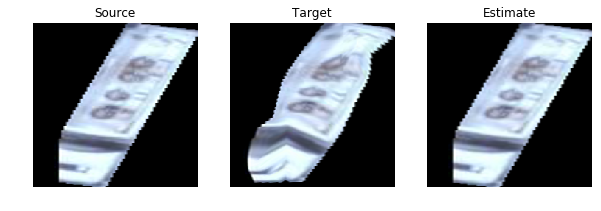

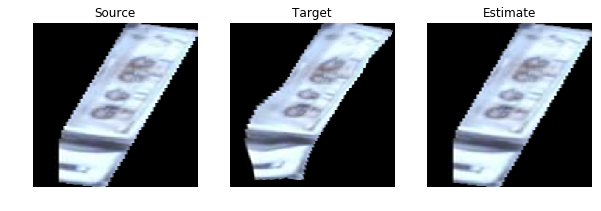

In [45]:
# Run a test for the upsampling function
# define path to images to upsample

path = './data/dataset_v2/training_imagery/test/'
test = {}
for sample in samples:
    test[sample] = samples[sample]
    break
    
upsample(path=path, samples=test, optimize=True, N_fixed=2, N_opt=1, show_result=True)

In [1]:
import numpy as np

def calculate_precision(pred, true):
    predicted_positives = (np.array(pred) == 1).sum()
    
    true_positives = np.array([a == b and a == 1 for a, b in zip(pred, true)])
    true_positives = (np.array(true_positives) == 1).sum()

    result = true_positives / predicted_positives
    
    return result

def AP(pred, true):
    precision = calculate_precision(pred, true)
    a = np.array([a == b and a == 1 for a, b in zip(pred, true)])
    score = (np.array(a) ==True).sum() * precision
    
    result = score / K
    
    return result



def MAP(predicted_data, true_data):
    result = np.array([AP(pred, true) for pred, true in zip(predicted_data, true_data)]).sum() / K

    return result

In [6]:
pred = [0, 0, 1, 0, 1]
true = [0, 0, 0, 0, 1]

a = np.array([a == b and a == 1 for a, b in zip(pred, true)])
s = (np.array(a) == True).sum()

1

In [ ]:
for p in pred:
    ap 

In [9]:
threshold = 0.5
pred = [[0, 0], [1, 0], [0, 1]]
output = [[0, 0], [0, 1], [0, 1]]

[[1 if pred > threshold else 0 for pred in sample] for sample in output]

[[0, 0], [0, 1], [0, 1]]

In [15]:
t = []
t.append([1 if pred > threshold else 0 for sample in output for pred in sample])
print(t)
t.append([0, 0, 0])
print(t)
t[0]

[[0, 0, 0, 1, 0, 1]]
[[0, 0, 0, 1, 0, 1], [0, 0, 0]]


[0, 0, 0, 1, 0, 1]